In [48]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy.signal import argrelextrema
%matplotlib inline

sys.path.insert(0, "../preprocess/")
import rate_text_by_emotion as rtbe
importlib.reload(rtbe)

import generate_music_specifications as gms
importlib.reload(gms)

<module 'generate_music_specifications' from '../preprocess/generate_music_specifications.py'>

In [2]:
data_path = "../data/literature/"
sample_file = "sample_text.txt"
# sample_file = "sample_text3.txt"

In [3]:
test_literature = rtbe.Literature(data_path + sample_file)

In [38]:
test_literature.split_into_sections(3)

In [39]:
test_literature.sections[1].subsections[1].start

37

In [5]:
test_literature.sections[0].emotion_counts

{'fear': 3,
 'negative': 5,
 'joy': 5,
 'positive': 13,
 'trust': 7,
 'anticipation': 9,
 'disgust': 2,
 'surprise': 5,
 'anger': 3,
 'sadness': 0,
 'total words': 238}

In [6]:
test_literature.sections[0].emotion_density

{'fear': 0.012605042016806723,
 'negative': 0.02100840336134454,
 'joy': 0.02100840336134454,
 'positive': 0.0546218487394958,
 'trust': 0.029411764705882353,
 'anticipation': 0.037815126050420166,
 'disgust': 0.008403361344537815,
 'surprise': 0.02100840336134454,
 'anger': 0.012605042016806723,
 'sadness': 0.0}

In [7]:
test_literature.sentence_df.head()

,sentences,emotional rating class,emotional rating dict,word count,fear,negative,joy,positive,trust,anticipation,disgust,surprise,anger,sadness,pos - neg,pos - neg cumulative sum
0,Chapter 1\nIt is a truth universally acknowled...,<rate_text_by_emotion.EmotionalRating object a...,"{'fear': 1, 'negative': 1, 'joy': 2, 'positive...",25,1,1,2,3,3,2,1,2,1,0,2,2
1,However little known the feelings or views of ...,<rate_text_by_emotion.EmotionalRating object a...,"{'fear': 0, 'negative': 0, 'joy': 0, 'positive...",47,0,0,0,2,2,0,0,0,0,0,2,4
2,"“My dear Mr. Bennet,” said his lady to him one...",<rate_text_by_emotion.EmotionalRating object a...,"{'fear': 0, 'negative': 0, 'joy': 0, 'positive...",21,0,0,0,1,0,0,0,0,0,0,1,5
3,Mr. Bennet replied that he had not.,<rate_text_by_emotion.EmotionalRating object a...,"{'fear': 0, 'negative': 0, 'joy': 0, 'positive...",7,0,0,0,0,0,0,0,0,0,0,0,5
4,"“But it is,” returned she; “for Mrs. Long has ...",<rate_text_by_emotion.EmotionalRating object a...,"{'fear': 0, 'negative': 0, 'joy': 0, 'positive...",19,0,0,0,0,0,1,0,0,0,0,0,5


In [8]:
# test_literature.sections[0].create_subsection(test_literature.sentence_df, 4)
# print(test_literature.sections[0].subsections[0].emotion_density)
# print(test_literature.sections[0].subsections[0].end)

{'fear': 0.010752688172043012, 'negative': 0.010752688172043012, 'joy': 0.021505376344086023, 'positive': 0.06451612903225806, 'trust': 0.053763440860215055, 'anticipation': 0.021505376344086023, 'disgust': 0.010752688172043012, 'surprise': 0.021505376344086023, 'anger': 0.010752688172043012, 'sadness': 0.0}
3


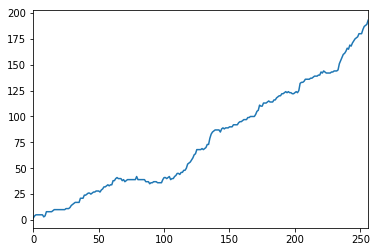

In [9]:
cum_sum = test_literature.sentence_df["pos - neg cumulative sum"] 
# smooth_cum_sum =  rtbe.smooth(cum_sum, window_len=25)
cum_sum.plot("line")

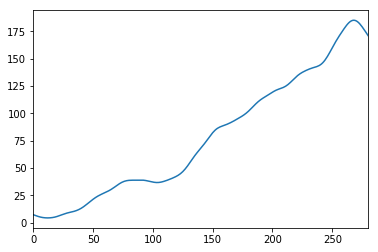

In [10]:
pd.Series(test_literature.smooth_cum_sum).plot("line")

In [11]:
rtbe.find_min_max(test_literature.smooth_cum_sum)

[12, 89, 104, 268]

In [12]:
test_literature.sentence_df["pos - neg cumulative sum"].sum() 

19756

In [13]:
rtbe.emotions

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust'}

In [14]:
# test_literature.aggregate_emotional_counts()

In [15]:
# literature_emotions = calc_multiple_emotional_counts("../data/literature/")

In [16]:
# literature_densities = calc_emotion_densities(literature_emotions)

In [17]:
# calc_min_max_differences(literature_densities)

In [18]:
# calc_overall_emotional_density(literature_emotions["sample_text.txt"])

In [19]:
test_literature.emotion_density

{'fear': 0.009916610322289835,
 'negative': 0.023439260761775976,
 'joy': 0.030876718503493352,
 'positive': 0.06693711967545639,
 'trust': 0.03673653369393735,
 'anticipation': 0.02681992337164751,
 'disgust': 0.0074374577417173765,
 'surprise': 0.016227180527383367,
 'anger': 0.008113590263691683,
 'sadness': 0.008113590263691683}

In [20]:
key = gms.calc_key(test_literature.emotion_density)
print(key)

c major


In [21]:
literature_minmax_stats = gms.calc_min_max_differences("XXXXX")
literature_minmax_stats

{'max_JS': 0.008, 'min_JS': -0.008, 'max_AS': 0.017, 'min_AS': -0.002}

In [22]:
# need to edit sections class
# also, refactor section and literature class because they share alot of the same code.

In [23]:
# octave is off because sample size is small and the minmax stats are not from 
# my own dataset
overall_octave = gms.calc_overall_octave(
    test_literature.emotion_density, 
    literature_minmax_stats["min_JS"],
    literature_minmax_stats["max_JS"],
)
overall_octave

8

In [24]:
emotion_octave = gms.calc_emotion_octave(overall_octave, test_literature.emotion_density)
emotion_octave

{'trust': 9, 'joy': 9}

In [25]:
tempo = gms.calc_tempo(
    test_literature.emotion_density,
    literature_minmax_stats["min_AS"],
    literature_minmax_stats["max_AS"]
)
tempo

139

In [26]:
min_trust = test_literature.find_min_max_densities("trust", False)
max_trust = test_literature.find_min_max_densities("trust")
print(min_trust)
print(max_trust)

0.00966183574879227
0.042905405405405404


In [36]:
num_notes = gms.calc_num_of_notes(test_literature.sections[0].emotion_density["trust"], min_trust, max_trust)
num_notes

4

In [28]:
int(3.33)

3

In [50]:
max_trust_sec1 = test_literature.sections[1].find_min_max_densities("trust")
min_trust_sec1 = test_literature.sections[1].find_min_max_densities("trust", False)

In [52]:
gms.calc_pitch(
    test_literature.sections[1].subsections[1].emotion_density["trust"],
    min_trust_sec1,
    max_trust_sec1,
    key
)

'E'